In [1]:
import numpy as np
import scipy
import scipy.fftpack
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x, add_noise=False):
    if add_noise:
        return np.sin(2*np.pi*x)+np.random.normal(scale=0.1, size=len(x))
    else:
        return np.sin(2*np.pi*x)

N = 1000 # sample points

x = np.linspace(0, 1, N)
y = f(x,True)

yf = scipy.fftpack.fft(y)

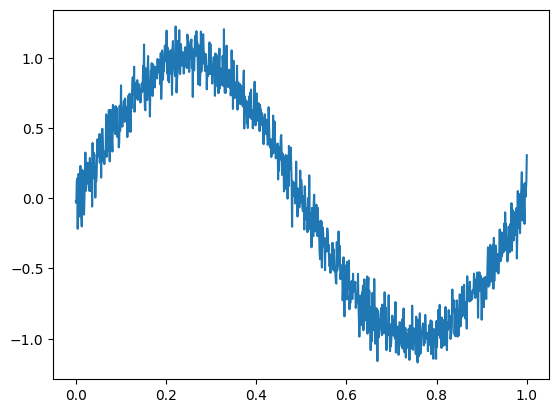

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.5)
plt.show()

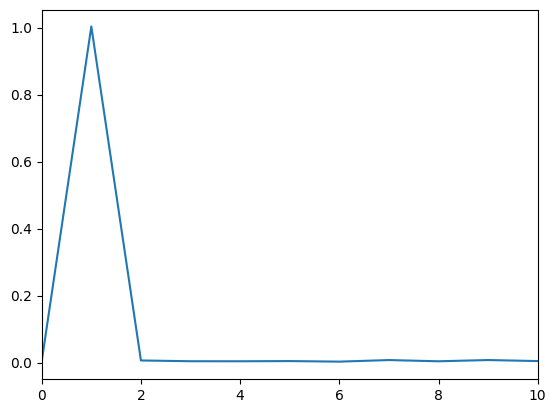

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot((2.0/N)*np.abs(yf[:N//2]), linewidth=1.5)
ax.set_xlim([0, 10])
plt.show()

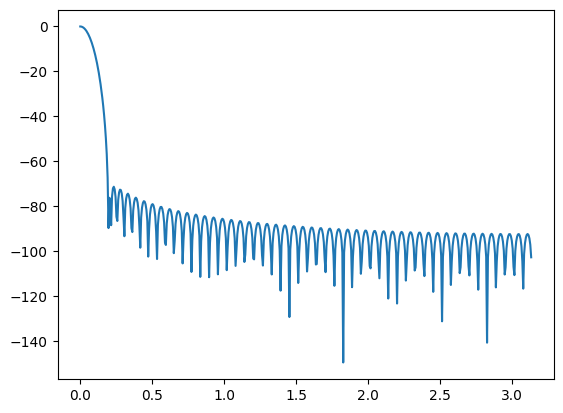

In [5]:
kernel_size = 100
kernel = scipy.signal.firwin(kernel_size,0.01,window=('kaiser',8))
w, h = scipy.signal.freqz(kernel)
z = scipy.signal.convolve(y, kernel, mode='same')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(w, 20*np.log10(np.abs(h)), linewidth=1.5)
plt.show()

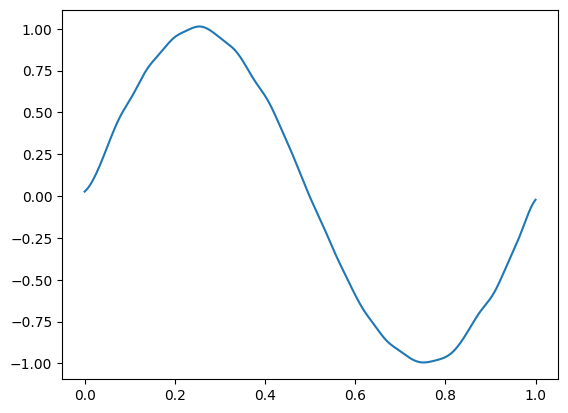

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, z, linewidth=1.5)
plt.show()